## Homework 4

### 3 Chapter 8

Consider the Gini index, classification error, and entropy in a
simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of ˆpm1. The xaxis
should display ˆpm1, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes, ˆpm1 = 1− ˆpm2. You could make
this plot by hand, but it will be much easier to make in R.


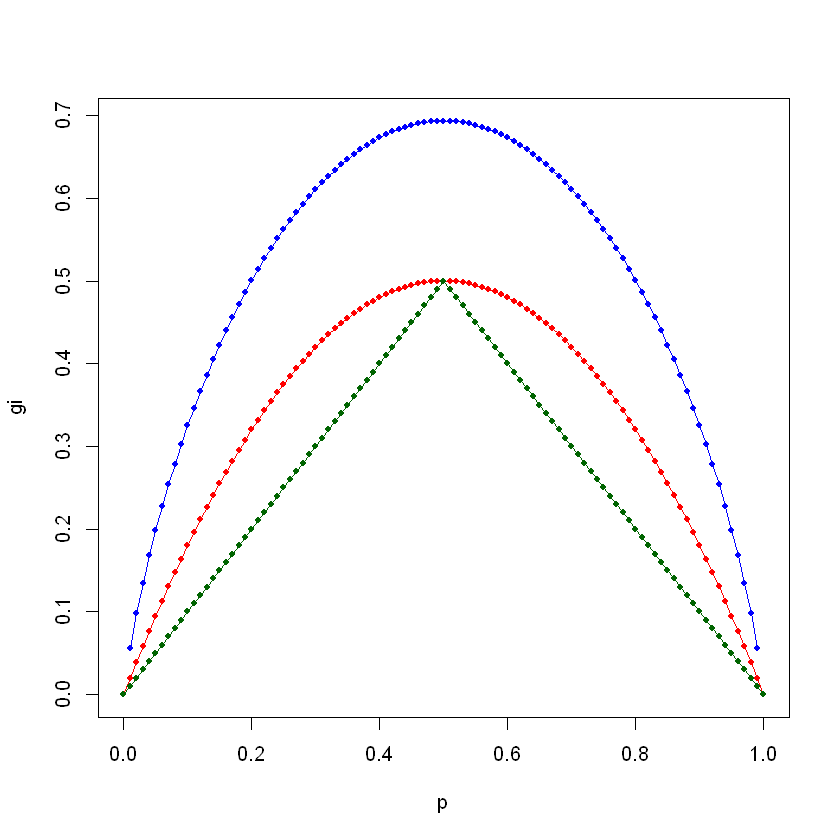

In [7]:
p <- seq(0,1,0.01)
q<-(1-p)

gi<- p*(q)*2
ent<--(p*log(p)+(q)*log(q))
cl_e<-1-pmax(p, q)

plot(p,gi,type="o",pch=20,col="red",ylim=c(0,max(ent,na.rm=T)))
points(p,ent,type="o",pch=20,col="blue")
points(p,cl_e,type="o",pch=20,col="darkgreen")


### 5 Chapter 8

Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

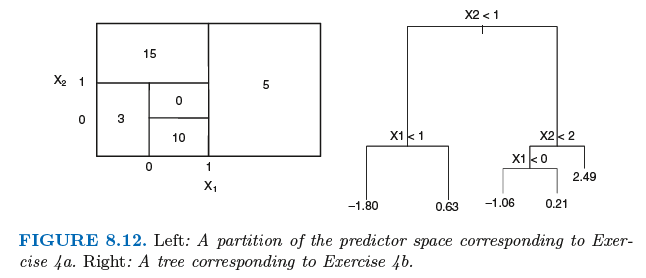

There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?


In [9]:
P <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
sum(P[P>=0.5])>sum(P[P<0.5]) #true

[1] TRUE

This means that by the majority vote approach, there are more reds than greens, then the classification would be RED. 

In [11]:
mean(P)

[1] 0.45

By the average approach, the mean of P is less than 0.5, which would lead to a GREEN classification.

### 8 Chapter 8

In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

(b) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine
which variables are most important.

(e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables
aremost important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

In [13]:
#a)
library(ISLR)

set.seed(42)
train<-sample(nrow(Carseats),nrow(Carseats)*0.7)
test<-c(1:nrow(Carseats))[!c(1:nrow(Carseats))%in%train]

train<-Carseats[train,]
test<-Carseats[test,]
nrow(train)
nrow(test)

[1] 280

[1] 120


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "CompPrice"  
[6] "Advertising"
Number of terminal nodes:  20 
Residual mean deviance:  2.41 = 626.6 / 260 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.85300 -0.98900 -0.04917  0.00000  0.94850  3.86400 

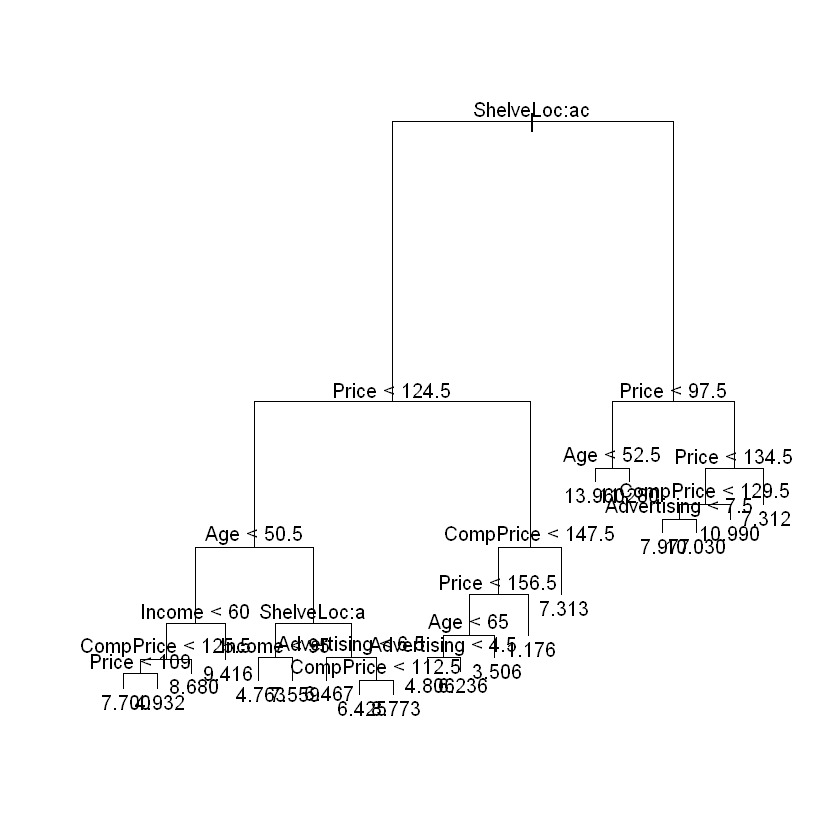

In [19]:
#b) install.packages("tree")
library(tree)
treefit <- tree(Sales ~ ., data = train)
summary(treefit)

plot(treefit)
text(treefit)

In [20]:
pred <- predict(treefit, test)
mean((test$Sales - pred)^2) #4.21426449314102

[1] 4.214264

$size
 [1] 20 19 18 17 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 1541.146 1527.723 1528.194 1524.328 1540.106 1540.106 1548.026 1545.042
 [9] 1552.401 1552.401 1739.134 1747.123 1740.710 1688.086 1676.832 1756.717
[17] 1731.183 1794.658 2293.272

$k
 [1]      -Inf  23.06519  23.30787  23.50205  25.08459  25.13187  25.76446
 [8]  38.64353  39.39835  40.52336  58.66408  62.11176  62.32412  71.02198
[15]  81.08595 113.94884 130.62229 249.52862 482.46484

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

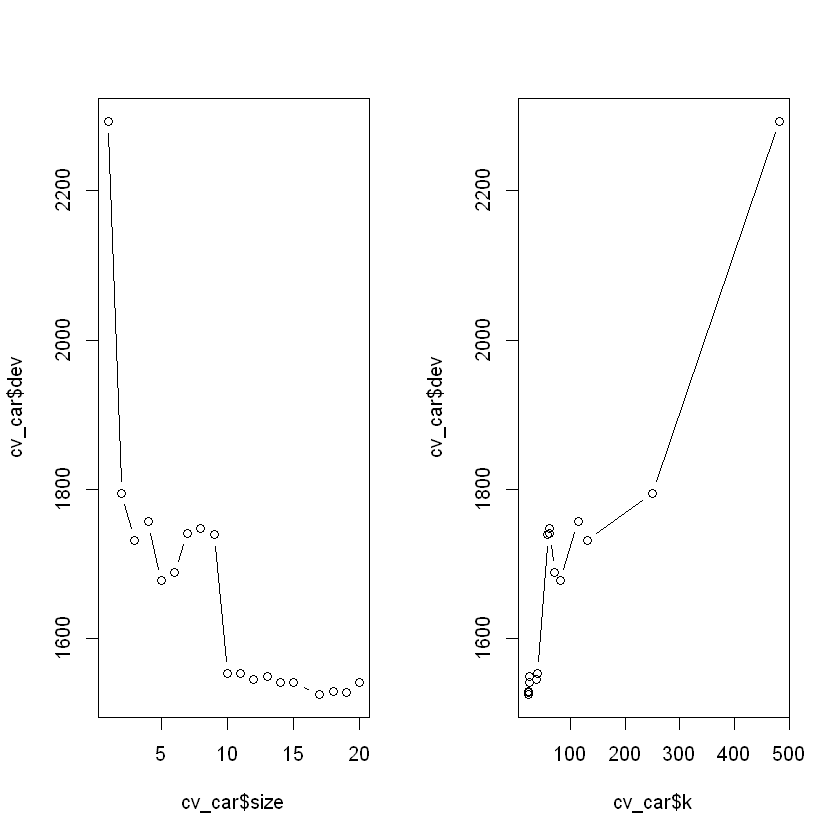

In [22]:
#c)

cv_car = cv.tree(treefit, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv_car$size, cv_car$dev, type = "b")
plot(cv_car$k, cv_car$dev, type = "b")
cv_car

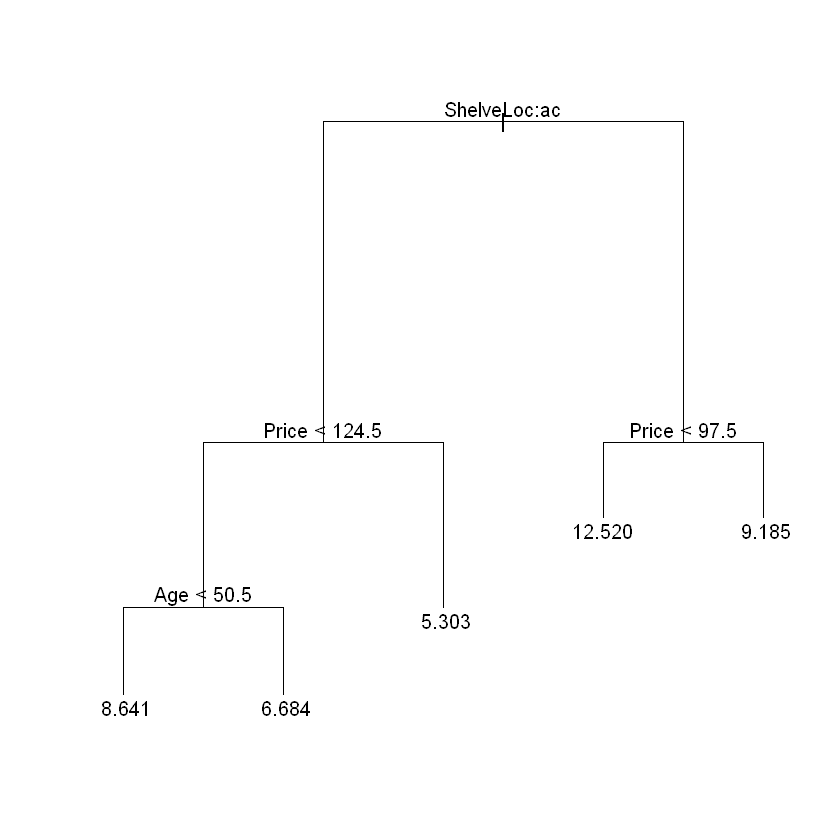

In [24]:
# best is 5

ptreefit<- prune.tree(treefit, best=5)
plot(ptreefit)
text(ptreefit)

In [25]:
pred <- predict(ptreefit, test)
mean((test$Sales - pred)^2) #4.70165650102036
#the error went up

[1] 4.701657

In [45]:
#d)
library(randomForest)

bagtree = randomForest(Sales ~ ., data = train,  mtry = 10, ntree = 500,
    importance = T)
pred = predict(bagtree, test)
mean((test$Sales - pred)^2)


[1] 2.020863

In [46]:
importance(bagtree)

,%IncMSE,IncNodePurity
CompPrice,34.561666,281.650779
Income,10.167984,126.261492
Advertising,21.127682,172.766805
Population,1.155422,84.107309
Price,65.481822,650.019600
ShelveLoc,70.216109,586.666086
Age,18.186549,198.051146
Education,3.464845,60.140406
Urban,1.673224,10.617317
US,2.051708,8.864561


The MSE is lower than in the normal tree, and the most important variables in descending order are ShelveLoc, Price, and CompPrice

In [35]:
#e)
library(randomForest)

rforest = randomForest(Sales ~ ., data = train, mtry = 5, ntree = 500, 
    importance = T)
pred = predict(rforest, test)
mean((test$Sales - pred)^2)
importance(rforest)

[1] 2.239753

,%IncMSE,IncNodePurity
CompPrice,23.46294742,235.28468
Income,6.03020854,147.61269
Advertising,18.60953034,209.14377
Population,0.08257165,114.82406
Price,50.58304857,562.50110
ShelveLoc,55.45205649,537.46225
Age,14.93503925,224.96943
Education,4.33388755,75.80293
Urban,0.16150528,15.04455
US,3.79823388,19.43691


The MSE for this model is a little higher than for bagged trees, and as for  importance it remains the same, ShelveLoc, Price and CompPrice

### 9 Chapter 8

This problem involves the OJ data set which is part of the ISLR
package.

(a) Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.

(d) Create a plot of the tree, and interpret the results.

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

(h) Which tree size corresponds to the lowest cross-validated classification
error rate?

(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.

(j) Compare the training error rates between the pruned and unpruned
trees. Which is higher?

(k) Compare the test error rates

In [54]:
#a)

set.seed(42)
train<-sample(nrow(OJ),800)
test<-c(1:nrow(OJ))[!c(1:nrow(OJ))%in%train]

train<-OJ[train,]
test<-OJ[test,]
nrow(train)
nrow(test)

[1] 800

[1] 270

In [55]:
#b)
treefit <- tree(Purchase ~ ., data = train)
summary(treefit)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM" "PriceDiff"  
Number of terminal nodes:  8 
Residual mean deviance:  0.7392 = 585.5 / 792 
Misclassification error rate: 0.1638 = 131 / 800 

The tree is using three variables: "LoyalCH"     "SalePriceMM" "PriceDiff" and 7 nods. The training error rate is 0.1638

In [56]:
#c) 
treefit

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.48285 285  296.00 MM ( 0.21404 0.78596 )  
     4) LoyalCH < 0.064156 64    0.00 MM ( 0.00000 1.00000 ) *
     5) LoyalCH > 0.064156 221  260.40 MM ( 0.27602 0.72398 )  
      10) SalePriceMM < 2.04 128  123.50 MM ( 0.18750 0.81250 ) *
      11) SalePriceMM > 2.04 93  125.00 MM ( 0.39785 0.60215 ) *
   3) LoyalCH > 0.48285 515  458.10 CH ( 0.83689 0.16311 )  
     6) LoyalCH < 0.753545 230  282.70 CH ( 0.69565 0.30435 )  
      12) PriceDiff < 0.265 149  203.00 CH ( 0.57718 0.42282 )  
        24) PriceDiff < -0.165 32   38.02 MM ( 0.28125 0.71875 ) *
        25) PriceDiff > -0.165 117  150.30 CH ( 0.65812 0.34188 )  
          50) LoyalCH < 0.703993 105  139.60 CH ( 0.61905 0.38095 ) *
          51) LoyalCH > 0.703993 12    0.00 CH ( 1.00000 0.00000 ) *
      13) PriceDiff > 0.265 81   47.66 CH ( 0.91358 0.08642 ) *
     7) LoyalCH > 0.753545 285  111

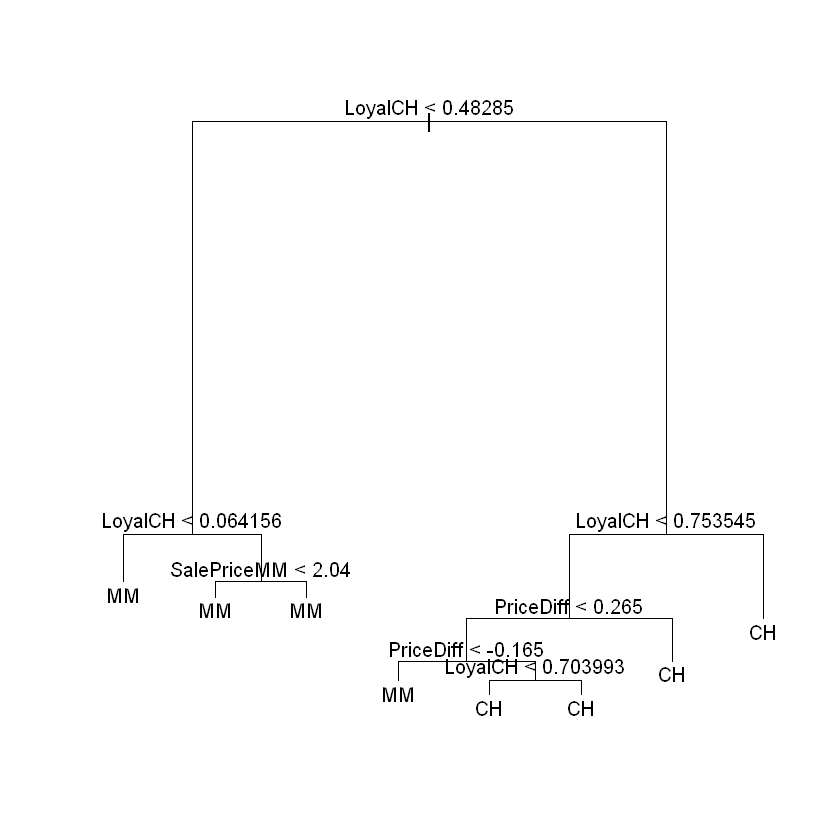

In [57]:
#d)
plot(treefit)
text(treefit)

In [58]:
#e)
pred = predict(treefit, test, type = "class")
table(test$Purchase, pred)

    pred
      CH  MM
  CH 125  36
  MM  15  94

In [59]:
#f)
cvfit = cv.tree(treefit, FUN = prune.tree)

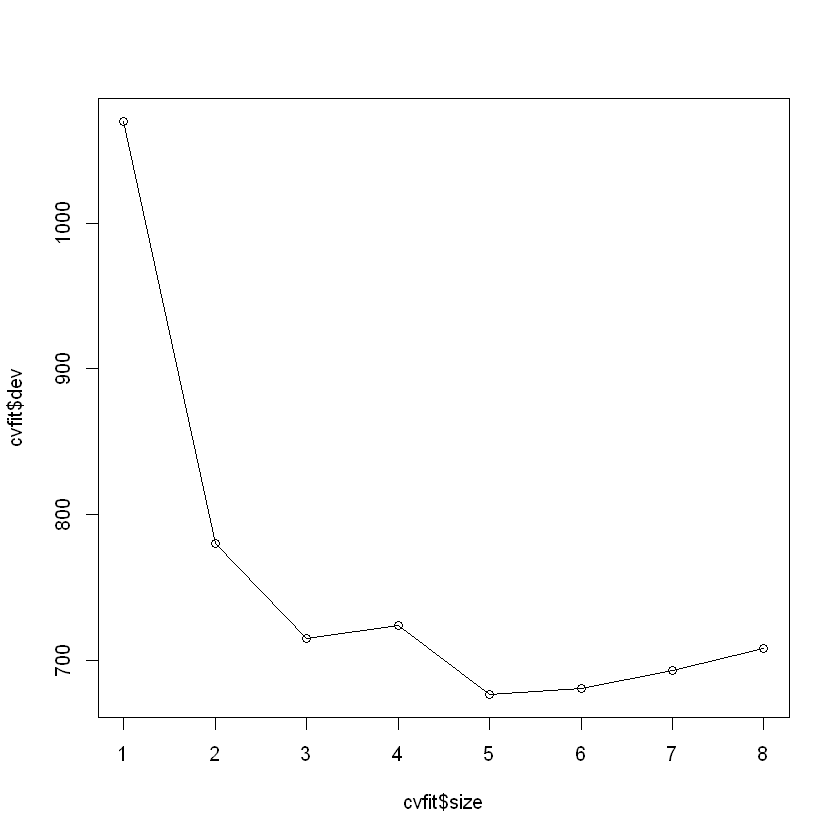

In [62]:
#g)
plot(cvfit$size, cvfit$dev, type = "o")

h)
The size 5 is the one with the lowest error.

In [64]:
#i)
ptreefit<- prune.tree(treefit, best = 5)



Classification tree:
snip.tree(tree = treefit, nodes = c(5L, 12L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.7833 = 622.7 / 795 
Misclassification error rate: 0.1812 = 145 / 800 

The error is slightly higher than the tree without prune.

In [ ]:
#j)
summary(ptreefit)

In [66]:
#k)
pred_noprune <- predict(treefit, test, type = "class")
error_noprune <- sum(test$Purchase != pred_noprune)
error_noprune/length(pred_noprune)

pred_prune <- predict(ptreefit, test, type = "class")
error_prune <- sum(test$Purchase != pred_prune)
error_prune/length(pred_prune)


[1] 0.1888889

[1] 0.2185185

Pruned tree has a higher error than the no prune.

###  10 Chapter 8

We now use boosting to predict Salary in the Hitters data set.

(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

(b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

(d) Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis.

(e) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.

(f) Which variables appear to be the most important predictors in
the boosted model?

(g) Now apply bagging to the training set. What is the test set MSE
for this approach?

In [67]:
#a)
Hitters <- subset(Hitters,!is.na(Hitters$Salary))
Hitters$lSalary <- log(Hitters$Salary)


In [69]:
#b) 
rows <- c(1:200)
train <- Hitters[rows,]
test <- Hitters[-rows,]